# More Pandas

31.10.2025 Sanna Määttä

## Introduction
- This Notebook contains examples and tasks how to use Pandas join and merge -functions.


In [1]:
# Take libraries in use
import pandas as pd
import matplotlib.pyplot as plt


## Join
- When joining two dataframes, we need to make a difference between the left and right dataframe

In [2]:
# Left DataFrame
df1 = pd.DataFrame({
    'name': ['Dolly', 'Jaws', 'Thunder', 'Kitty', 'Cujo'],
    'species': ['sheep', 'shark', 'horse', 'cat', 'dog']
}, index = [1, 2, 3, 4, 5])

# Right DataFrame
df2 = pd.DataFrame({
    'offspring': ['pup', 'foal', 'kitten', 'pup', 'joey']
}, index = [2, 3, 4, 5, 6])

print(df1)
print(df2)

      name species
1    Dolly   sheep
2     Jaws   shark
3  Thunder   horse
4    Kitty     cat
5     Cujo     dog
  offspring
2       pup
3      foal
4    kitten
5       pup
6      joey


In [3]:
# Left join (default), it is done on index

df1.join(df2)

,name,species,offspring
1,Dolly,sheep,NaN
2,Jaws,shark,pup
3,Thunder,horse,foal
4,Kitty,cat,kitten
5,Cujo,dog,pup


#### Notice how there is a Nan value at line 1 and index 6 of df2 is not included in left join.

### Let's check the right join next

In [4]:
# Right join
df1.join(df2, how = 'right')


,name,species,offspring
2,Jaws,shark,pup
3,Thunder,horse,foal
4,Kitty,cat,kitten
5,Cujo,dog,pup
6,NaN,NaN,joey


#### Notice how right join used all indexes of the right data frame and not the index 1 (that exists only in the left df).

### Inner join

In [5]:
# Inner join
df1.join(df2, how = 'inner')

,name,species,offspring
2,Jaws,shark,pup
3,Thunder,horse,foal
4,Kitty,cat,kitten
5,Cujo,dog,pup


#### Inner join only keeps rows with matching indexes in both DataFrames.

### Outer join

In [6]:
# Outer join (on index)
df1.join(df2, how = 'outer')

,name,species,offspring
1,Dolly,sheep,NaN
2,Jaws,shark,pup
3,Thunder,horse,foal
4,Kitty,cat,kitten
5,Cujo,dog,pup
6,NaN,NaN,joey


#### Outer join keeps all rows and fills missing values with NaN

## Merge

In [7]:
# Left DataFrame
df3 = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'name': ['Dolly', 'Jaws', 'Thunder', 'Kitty', 'Cujo'],
    'species': ['sheep', 'shark', 'horse', 'cat', 'dog']
})

# Right DataFrame
df4 = pd.DataFrame({
    'id': [2, 3, 4, 5, 6],
    'offspring': ['pup', 'foal', 'kitten', 'pup', 'joey']
})

print(df1)
print(df2)

      name species
1    Dolly   sheep
2     Jaws   shark
3  Thunder   horse
4    Kitty     cat
5     Cujo     dog
  offspring
2       pup
3      foal
4    kitten
5       pup
6      joey


In [9]:
# In merge, inner join is default.

pd.merge(df3, df4, on = 'id')

,id,name,species,offspring
0,2,Jaws,shark,pup
1,3,Thunder,horse,foal
2,4,Kitty,cat,kitten
3,5,Cujo,dog,pup


In [10]:
# Left Join
# Keeps all the rows from the left DataFrame, matching from the right where possible.

pd.merge(df3, df4, on = 'id', how = 'left')

,id,name,species,offspring
0,1,Dolly,sheep,NaN
1,2,Jaws,shark,pup
2,3,Thunder,horse,foal
3,4,Kitty,cat,kitten
4,5,Cujo,dog,pup


In [11]:
# Right Join
# Keeps all the rows from the right DataFrame.

pd.merge(df3, df4, on = 'id', how = 'right')

,id,name,species,offspring
0,2,Jaws,shark,pup
1,3,Thunder,horse,foal
2,4,Kitty,cat,kitten
3,5,Cujo,dog,pup
4,6,NaN,NaN,joey


In [12]:
# Outer Join
# Keeps all the rows from both, filling in NaN where there’s no match.

pd.merge(df3, df4, on = 'id', how = 'outer')

,id,name,species,offspring
0,1,Dolly,sheep,NaN
1,2,Jaws,shark,pup
2,3,Thunder,horse,foal
3,4,Kitty,cat,kitten
4,5,Cujo,dog,pup
5,6,NaN,NaN,joey


# Tasks
- Use the given dataframes (as they are).
- Show the dataframe(s) after every step.


In [22]:
# Left data frame
df1 = pd.DataFrame({
    'planet': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'type': ['Terrestrial', 'Terrestrial', 'Terrestrial', 'Terrestrial', 'Gas Giant', 'Gas Giant', 'Ice Giant', 'Ice Giant']
})

# Right data frame (do not fix the number of moons quite yet).
df2 = pd.DataFrame({
    'planet': ['Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
    'distance_from_earth_million_km': [77, 41, 78, 628, 1275, 2720, 4350],
    'moons': [0, 100, 42, 220, 1045, 15, 'NaN']
})

print(df1)
print(df2)

    planet         type
0  Mercury  Terrestrial
1    Venus  Terrestrial
2    Earth  Terrestrial
3     Mars  Terrestrial
4  Jupiter    Gas Giant
5   Saturn    Gas Giant
6   Uranus    Ice Giant
7  Neptune    Ice Giant
    planet  distance_from_earth_million_km moons
0  Mercury                              77     0
1    Venus                              41   100
2     Mars                              78    42
3  Jupiter                             628   220
4   Saturn                            1275  1045
5   Uranus                            2720    15
6  Neptune                            4350   NaN


### Merge df1 and df2 (using merge) so that all rows from both data frames are included, save the merged dataframe into df3.
- Notice that in merge the planets get sorted alphabetically


In [29]:
df3 = pd.merge(df1, df2, on = 'planet', how = 'outer')
df3

,planet,type,distance_from_earth_million_km,moons
0,Earth,Terrestrial,NaN,NaN
1,Jupiter,Gas Giant,628.0,220
2,Mars,Terrestrial,78.0,42
3,Mercury,Terrestrial,77.0,0
4,Neptune,Ice Giant,4350.0,NaN
5,Saturn,Gas Giant,1275.0,1045
6,Uranus,Ice Giant,2720.0,15
7,Venus,Terrestrial,41.0,100


### Change the distance_from_earth_million_km to distance

In [30]:
df3.rename(columns = {'distance_from_earth_million_km': 'distance'}, inplace = True)

In [31]:
df3

,planet,type,distance,moons
0,Earth,Terrestrial,NaN,NaN
1,Jupiter,Gas Giant,628.0,220
2,Mars,Terrestrial,78.0,42
3,Mercury,Terrestrial,77.0,0
4,Neptune,Ice Giant,4350.0,NaN
5,Saturn,Gas Giant,1275.0,1045
6,Uranus,Ice Giant,2720.0,15
7,Venus,Terrestrial,41.0,100


### Let's say that there is a blunder in the data and _after_ merging the dataframe you notice that the number of moons is totally wrong. Fix them into the merged dataframe. Correct numbers of moons is found here: https://spaceplace.nasa.gov/how-many-moons/en/

In [32]:
moons = [1, 95, 2, 0, 16, 274, 28, 0]
df3['moons'] = moons

df3

,planet,type,distance,moons
0,Earth,Terrestrial,NaN,1
1,Jupiter,Gas Giant,628.0,95
2,Mars,Terrestrial,78.0,2
3,Mercury,Terrestrial,77.0,0
4,Neptune,Ice Giant,4350.0,16
5,Saturn,Gas Giant,1275.0,274
6,Uranus,Ice Giant,2720.0,28
7,Venus,Terrestrial,41.0,0


### Change NaN into 0 (or 0.0)

In [34]:
df3.fillna(0, inplace=True)
df3

,planet,type,distance,moons
0,Earth,Terrestrial,0.0,1
1,Jupiter,Gas Giant,628.0,95
2,Mars,Terrestrial,78.0,2
3,Mercury,Terrestrial,77.0,0
4,Neptune,Ice Giant,4350.0,16
5,Saturn,Gas Giant,1275.0,274
6,Uranus,Ice Giant,2720.0,28
7,Venus,Terrestrial,41.0,0


### Add a column named moon-% and count the percentage of moons each planet has (moons of the planet / total number of moons) * 100%.
- Show df3

In [36]:
df3['moon-%'] = (df3['moons'] / df3['moons'].sum()) * 100
df3

,planet,type,distance,moons,moon-%
0,Earth,Terrestrial,0.0,1,0.240385
1,Jupiter,Gas Giant,628.0,95,22.836538
2,Mars,Terrestrial,78.0,2,0.480769
3,Mercury,Terrestrial,77.0,0,0.000000
4,Neptune,Ice Giant,4350.0,16,3.846154
5,Saturn,Gas Giant,1275.0,274,65.865385
6,Uranus,Ice Giant,2720.0,28,6.730769
7,Venus,Terrestrial,41.0,0,0.000000


### Create a pie chart (use matplotlib's .pie -function) from the moons column
- Use autopct -parameter so that the pie chart includes the percentage automatically


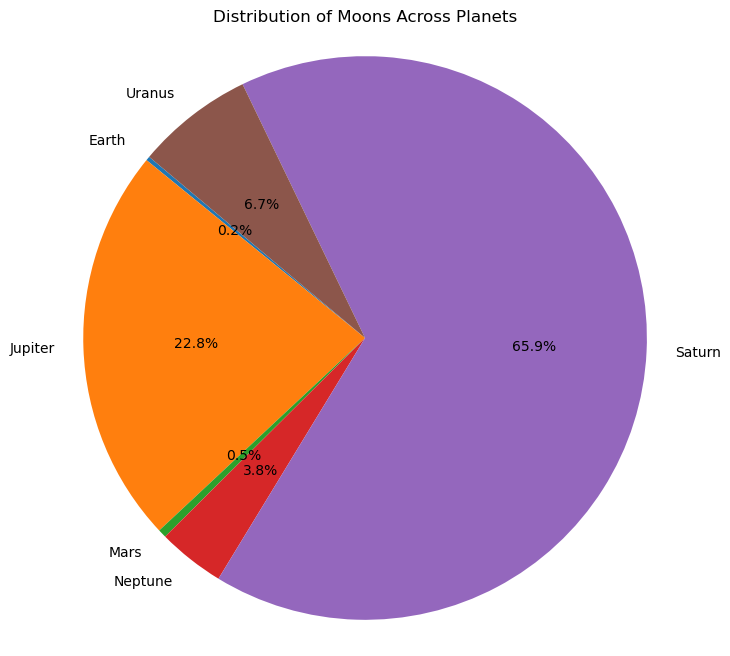

In [42]:
df_filtered = df3[df3['moons'] > 0]

plt.figure(figsize=(8, 8))
plt.pie(
    df_filtered['moons'],
    labels=df_filtered['planet'],
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of Moons Across Planets')
plt.axis('equal')
plt.show()